<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Michael,

Great job working through the Zuber project! Your notebook clearly shows your ability to clean, explore, and analyze data with purpose. You’ve followed a logical structure and used sound statistical techniques, which is fantastic to see. The project demonstrates a solid understanding of the business questions and how to derive insights from data.

---

<div style="border-left: 7px solid green; padding: 10px;">
<b>✅ Strengths:</b>
<ul>
  <li><b>Clean Data Pipeline:</b> You performed thorough checks for nulls and duplicates, including removing nearly 200 exact duplicates in the ride dataset—a great call backed by rationale.</li>
  <li><b>Logical Project Flow:</b> The narrative is easy to follow, and your markdown descriptions give clear context to each step.</li>
  <li><b>Appropriate Visualization:</b> The bar charts effectively communicate the main insights, especially the dominance of Flash Cab and the top neighborhoods for dropoffs.</li>
  <li><b>Valid Hypothesis Test:</b> You correctly implemented a two-sample t-test with a well-stated null/alternative hypothesis and interpreted the p-value properly.</li>
</ul>
</div>

<div style="border-left: 7px solid gold; padding: 10px;">
<b>⚠️ Suggestions for Improvement:</b>
<ul>
  <li><b>Comparison Group Mismatch:</b> You compared rainy Saturdays to <i>other Saturdays in good weather</i>, but your markdown states "other days of the week in good weather." These don't match—please revise either the logic or the explanation for clarity and consistency.</li>
  <li><b>Add Numeric Averages to Hypothesis Section:</b> Including the mean ride durations for each group would help quantify the difference and make your conclusions more impactful.</li>
  <li><b>Consider Minor Plot Improvements:</b> Your bar plots are useful, but adding value labels or sorting by trip count would increase readability and impact.</li>
</ul>
</div>

---

**Conclusion**

Michael, this was a well-executed analysis. You showed technical competence, structured storytelling, and relevant business thinking. With minor tweaks—especially around comparison consistency and deeper visualization insights—this would be an excellent project to showcase.

Keep it up!
    
**Status: approved :)**

</div>

# Project 6: Data Collection and Storage (SQL)

In this project, I'm analyzing data for Zuber, a new ride-share company launching in Chicago. I'll be looking for patterns and trends in rider data and trying to understand more about how weather can impact certain rides based on data from our competitors ride-share information. I'll be checking 3 different datasets for this analysis: one containing information on taxi companies and the amount of trips they provided between November 15th and 16th of 2017, another with neighborhood dropoff locations and the average amount of dropoffs to those neighborhoods in the entire month of November 2017, and finally one containing data on rides from Chicago's Loop neighborhood out to O'Hare International Airport. I'll be inspecting each set for missing and duplicate data, ensuring each datatype makes sense for the data it represents. I'll then graph each taxi company's number of rides and identify the top 10 neighborhoods in Chicago by number of dropoffs to them. Finally, I'll test the hypothesis that the average duration of rides from the Loop to O'Hare changes on rainy Saturdays.

In [1]:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df4 = pd.read_csv('/datasets/project_sql_result_04.csv')
df7 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
print((df1.isnull().sum()/len(df1))*100)
print()
print((df4.isnull().sum()/len(df4))*100)
print()
print((df7.isnull().sum()/len(df7))*100)

company_name    0.0
trips_amount    0.0
dtype: float64

dropoff_location_name    0.0
average_trips            0.0
dtype: float64

start_ts              0.0
weather_conditions    0.0
duration_seconds      0.0
dtype: float64


No missing values in any of the datasets, that's nice to see!

In [4]:
print(df1.duplicated().sum())
print()
print(df4.duplicated().sum())
print()
print(df7.duplicated().sum())

0

0

197


197 duplicates in the df7 dataframe, I'll drop them since it seems unlikely that nearly 200 rides started at the exact same time and had the same duration of the ride

In [5]:
df7 = df7.drop_duplicates()
df7.duplicated().sum()

0

In [6]:
print(df1.info())
print()
print(df4.info())
print()
print(df7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            871 non-null    object 
 1   weather_conditions  871 non-null    object 
 2   

In [7]:
df7['start_ts'] = pd.to_datetime(df7['start_ts'])
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


All the data types look fine but I converted the start_ts column in df7 to datetime for later analysis

## Identify the most utilized taxi companies and the top 10 neighborhoods in terms of dropoffs 

In [8]:
df1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


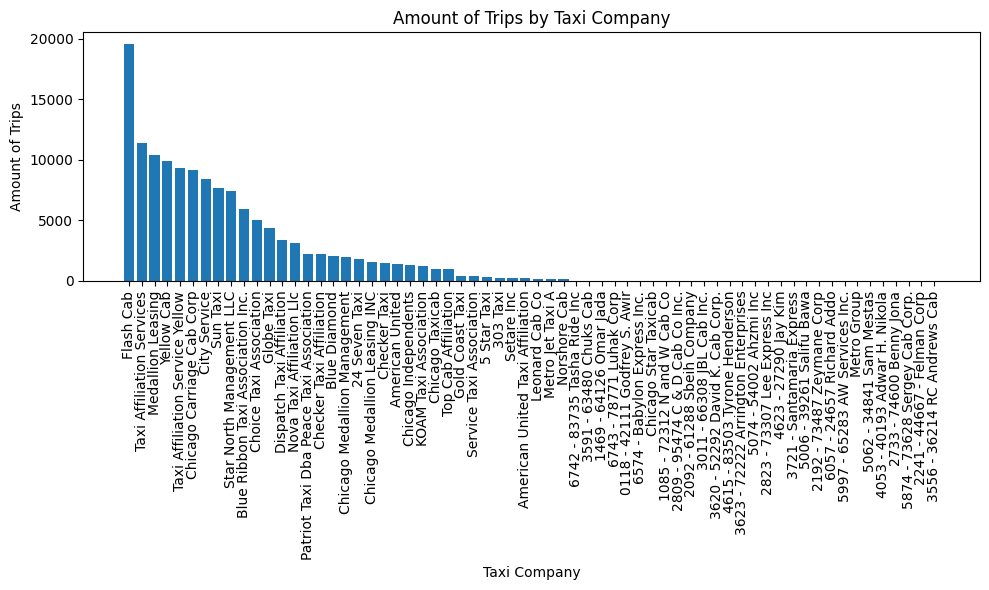

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(df1['company_name'], df1['trips_amount'])
plt.xlabel('Taxi Company')
plt.ylabel('Amount of Trips')
plt.title('Amount of Trips by Taxi Company')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From this graph we can see that Flash Cab is the most popular taxi company used between November 15th and 16th of 2017, nearly twice as often used as it's closest competitor!

In [10]:
df4 = df4.head(10)
df4

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


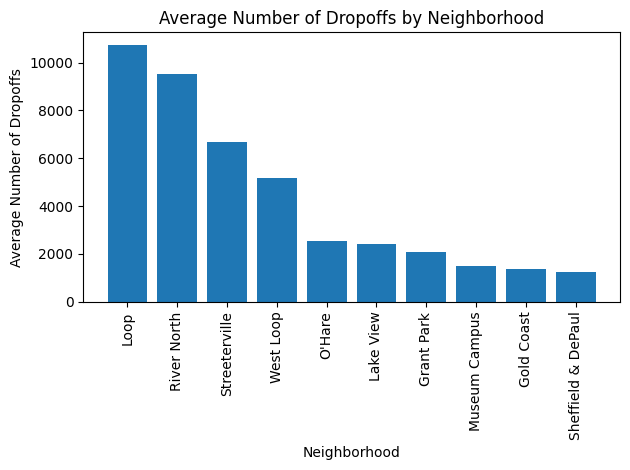

In [11]:
plt.bar(df4['dropoff_location_name'], df4['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Dropoffs')
plt.title('Average Number of Dropoffs by Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It looks like these are the top 10 neighborhoods in Chicago that people get dropped off. As a Chicago resident, this definitely makes sense as a lot of people live/work in the Loop and in the surrounding neighborhoods (River North, Streeterville, West Loop), and a lot of people travel using the O'Hare airport!

## Testing the hypothesis that the average duration of rides from the Loop to O'Hare changes on rainy Saturdays

Based on previous work done to the data in the SQL portion of the project, the weather_conditions column should display "Bad" when there are weather conditions that contain the words "rain" or "storm", so I'll filter df7 (dataset containing information on rides from the Loop to O'Hare) to two sets of good conditions every day of the week and rainy conditions on Saturdays for comparison.

In [12]:
df7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [13]:
rainy_saturday = df7[(df7['weather_conditions'] == 'Bad') & (df7['start_ts'].dt.dayofweek == 5)].reset_index(drop = True)
rainy_saturday.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-04 16:00:00,Bad,2969.0
1,2017-11-18 12:00:00,Bad,1980.0
2,2017-11-04 17:00:00,Bad,2460.0
3,2017-11-04 16:00:00,Bad,2760.0
4,2017-11-18 12:00:00,Bad,2460.0


In [14]:
other_days = df7[~(df7['weather_conditions'] == 'Bad') & (df7['start_ts'].dt.dayofweek == 5)].reset_index(drop = True)
other_days.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


For this test, our null hypothesis would be that there is no significant difference between rainy Saturday ride durations and ride durations any other day of the week in good weather. The alternative hypothesis would be that there is a significant difference between rainy Saturday ride durations and ride durations any other day of the week in good weather. I'll be using an alpha of 0.05 for this test, meaning I will feel 95% confident in the results of this test being accurate based on the data provided

In [15]:
alpha = 0.05
results = st.ttest_ind(rainy_saturday['duration_seconds'], other_days['duration_seconds'])
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('The null hypothesis is rejected, there is a statistically significant difference in ride duration')
else:
    print('The null hypothesis is not rejected, there is not a statistically significant difference in ride duration')

p-value:  7.397770692813658e-08
The null hypothesis is rejected, there is a statistically significant difference in ride duration


Based on the results of this t-test, we would reject the null hypothesis that there is no significant difference between rainy Saturday ride durations and ride durations any other day of the week in good weather.

## Conclusions

Based on this analysis, I can conclude that there is a large portion of Chicago residents who utilize Flash Cab as their preferred taxi company, so for Zuber to succeed we should either focus on going after those customers or the rest of Flash Cab's competitors customers with advertisements and promotions to convince them to utilize our service. I mentioned it previously in this analysis, but with a large portion of the city working/living in/near the Loop, it makes sense that most of the dropoff locations are in this neighborhood and nearby neighborhoods, as well as at the airport. However, there is a second airport in Chicago, Midway, which is missing from this dataset. I think future analysis should take Midway into account to provide an even clearer picture of one of the most popular reasons people utilize ride-shares in the first place.